# 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

### (1) 我们的自变量是什么？因变量是什么？

自变量是文字与其颜色是否一致，因变量是参与者完成阅读时所耗费的时间。

### (2) 此任务的适当假设集是什么？
你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。
### 你想执行什么类型的统计检验？
为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

设 *μ<sub>con</sub> 为一致文字条件下的总体时间均值，μ<sub>incon</sub> 为不一致文字条件下的总体时间均值*，则

**H0零假设**：*μ<sub>con</sub> - μ<sub>incon</sub> = 0*，即两种条件下的阅读时间没有区别。

**Ha对立假设**：*μ<sub>con</sub> - μ<sub>incon</sub> != 0* ，即两种条件下的阅读时间有较大区别。

可选择显著性水平 α 取 0.05的配对 t 检验中双尾检验。
假设前提：
1. 总体特征（如不同文字条件下阅读的总体时间均值）是未知的，*任务中选取的参与者都是普通大众，可以假设两种不同条件下参与者的阅读时间均值之差是服从正态分布的。*不同条件下对于完成时间的影响，我们并不了解。无法进行z检验。
2. 每一位参与者在一致文字条件下和不一致文字条件下分别进行阅读测试，获得的阅读测试完成时间是两组样本值。显然每一位参与者测试获得的两个时间都是一一对应、配对的。
3. 由于参与者之间的测试是相互独立互不影响的，所以测试获得的样本值之差也是相互独立的，可以假设两个阅读时间的样本值之差是服从正态分布的。虽然样本数量小于30，但采用t检验不会造成较大影响。
4. 根据零假设，验证的是阅读时间是否有区别，是双尾检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

### (3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [7]:
# 执行分析
from pandas import Series, DataFrame
import pandas as pd
strr = pd.read_csv('stroopdata.csv')
time_Cong_ave = strr.Congruent.mean()
time_Incong_ave = strr.Incongruent.mean()
time_Cong_STDEVA = strr.Congruent.std()
time_Incong_STDEVA = strr.Incongruent.std()
time_Cong_ave, time_Incong_ave, time_Cong_STDEVA, time_Incong_STDEVA

(14.051125000000004, 22.01591666666667, 3.559357957645195, 4.797057122469138)

### 集中趋势测量：不同条件下花费的时间平均值。
一致文字条件下的阅读时间平均值time_Cong_ave=14.05
一致文字条件下的阅读时间平均值time_Incong_ave=22.02

### 变异测量：不同条件下花费的时间样本标准偏差。
一致文字条件下的阅读时间样本标准偏差time_Cong_STDEVA=3.56
一致文字条件下的阅读时间样本标准偏差time_Incong_STDEVA=4.80

### (4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

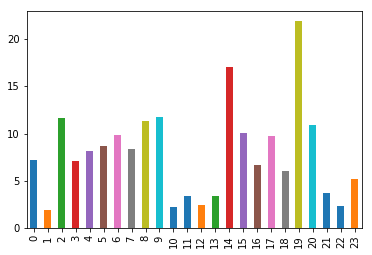

In [8]:
# 创建可视化图表
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
strr = pd.read_csv('stroopdata.csv')
strr_diff = strr.Incongruent - strr.Congruent
strr_diff.plot(kind='bar')
plt.show()

图中列高为每一位参与者（样本）在两种条件下所花费时间的差值（time_Incong-time_Cong）。很容易发现，不一致条件下花费时间均大于一致的时间。

### (5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [9]:
# 执行统计检验
from scipy import stats
stats.ttest_rel(strr.Congruent, strr.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

利用scipy计算后得出t = -8.02，p = 4.10e-08，很明显p < 0.05（即第2问中提到的α = 0.05），该结果是统计显著的。
根据该结果可以拒绝零假设，即参与者面对文字和颜色不一致的情况时，读出文字墨色的时间与文字和墨色一致条件下的时间不一致。

## 补充计算过程

### 置信水平或者显著性水平（α）

置信水平为 0.95,显著性水平为：0.05(即1-0.95)；

### 自由度

df = 24-1 = 23

### t临界值

根据置信水平和自由度，查t-table表得t<sub>critical</sub> = 2.069

### P值

两种条件下阅读时间之差均值: average(time<sub>con</sub> - time<sub>incon</sub>) = 7.9648
阅读时间之差的样本标准偏差Sd = 4.8648，由于是样本标准偏差，所以分母是 (n-1)
阅读时间之差的标准误差SEM = Sd/(n)^(1/2) = 0.993
据此可以得出 t-statistic = 7.9648/0.993 = 8.0209
显然t- statistic > t<sub>critical</sub>，所以p小于α，可以得出和scipy相同的结果。